### Inspecting data converted from patchmaster .dat to .nwb format

These test files were generated with the `dat_to_nwb.py` script [here](https://github.com/stephprince/x-to-nwb/tree/patchmaster-v2x32-testing) adapted from [this repo](https://github.com/byte-physics/x-to-nwb)


In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools

from nwbwidgets import nwb2widget
from pynwb import NWBHDF5IO

%matplotlib inline

In [2]:
# load the nwb files
filename = '..//test_data//10_03_19-2.nwb'

io = NWBHDF5IO(filename, 'r')
nwbfile = io.read()

In [3]:
# get the stimulus types of the acquisition and stimulus traces
stim_labels = []
acq_labels = []
for stim, acq in zip(nwbfile.stimulus.values(), nwbfile.acquisition.values()):
    s_label = eval(stim.description)['series_label']
    a_label = eval(acq.description)['series_label']
    stim_labels.append(s_label)
    acq_labels.append(a_label)

    assert s_label == a_label, "Stimulus and acquisition labels do not match"

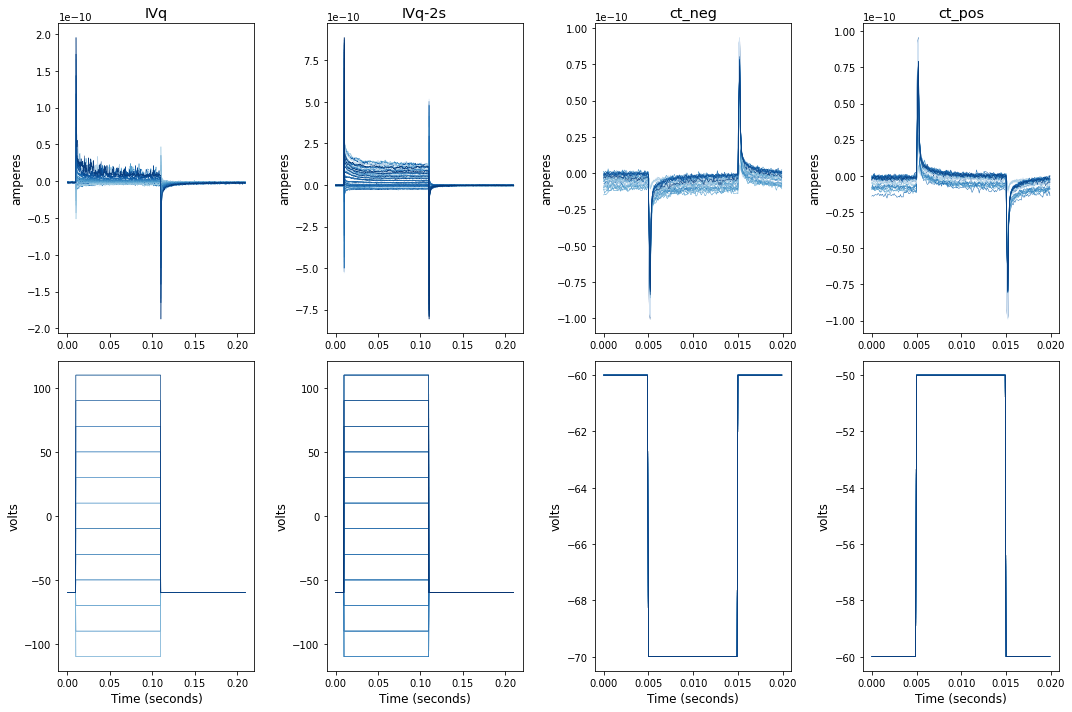

In [4]:
# visualize the  stim and acquisition traces
plt.figure(figsize=(15, 10))

# skipping the MEC and Miv plots because not sure they have the right info currently
plot_labels = [x for x in np.unique(stim_labels) if not x.startswith("M")]

# loop through stimulus types and plot stim and acq for each
for i, label in enumerate(plot_labels):
    n_traces = acq_labels.count(label)
    colors = itertools.cycle(sns.color_palette("Blues",n_traces))
    
    ax_acq = plt.subplot(2,len(plot_labels),i+1)
    ax_stim = plt.subplot(2,len(plot_labels),i+len(plot_labels)+1)
    for trace, stim in zip(nwbfile.acquisition.values(), nwbfile.stimulus.values()):
        trace_label = eval(trace.description)['series_label']
        if (trace_label == label): 
            ax_acq.plot(range(len(trace.data))/trace.rate, trace.data, c=next(colors), lw=.5)
            ax_acq.set_ylabel(trace.unit, size='large')
            ax_acq.set_title(label, size='x-large')
            
            ax_stim.plot(range(len(stim.data))/stim.rate, stim.data, c=next(colors), lw=.5)
            ax_stim.set_ylabel(stim.unit, size='large')
            ax_stim.set_xlabel(f'Time ({trace.starting_time_unit})', size='large')
            
plt.tight_layout()            
plt.show()

In [5]:
# visualize the sweep table
nwbfile.sweep_table.to_dataframe()

,series,sweep_number
id,,
0,[index_000 pynwb.icephys.VoltageClampSeries at...,2001001
1,[index_001 pynwb.icephys.VoltageClampSeries at...,2001002
2,[index_002 pynwb.icephys.VoltageClampSeries at...,2001003
3,[index_003 pynwb.icephys.VoltageClampSeries at...,2001004
4,[index_004 pynwb.icephys.VoltageClampSeries at...,2001005
...,...,...
709,[index_352 pynwb.icephys.VoltageClampStimulusS...,2030008
710,[index_353 pynwb.icephys.VoltageClampStimulusS...,2030009
711,[index_354 pynwb.icephys.VoltageClampStimulusS...,2030009


In [6]:
# inspect file with nwbwidgets
nwb2widget(nwbfile)